# **Exploratory Data Analysis - Laptops Pricing dataset**

# Objectives

After completing this lab you will see how to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, I will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Installing Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
print('Ready')

Ready

# Importing the dataset

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [5]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

Import the file to a pandas dataframe.


In [6]:
df = pd.read_csv(file_name, header=0)

> Note: The version of the lab I used is working on JupyterLite, which requires the dataset to be downloaded to the interface. While working on the downloaded version of this notebook on their local machines, you can simply **skip the steps above**, and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
#df = pd.read_csv(filepath, header=None)

Printing the first 5 entries of the dataset to confirm loading.


In [7]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Visualizing individual feature patterns

<AxesSubplot:xlabel='CPU_frequency', ylabel='Price'>

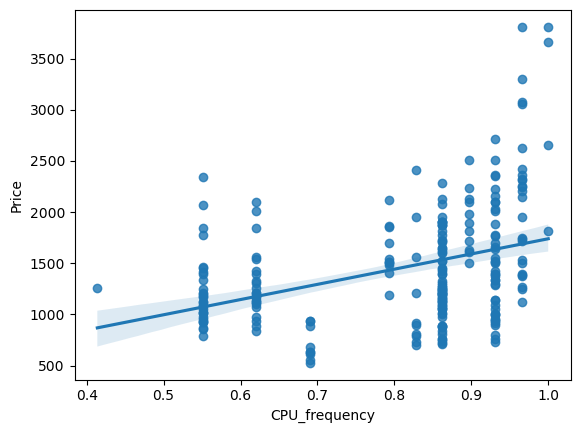

In [9]:
# CPU_frequency plot
sns.regplot(x='CPU_frequency', y='Price', data=df)

(0.0, 3974.15)

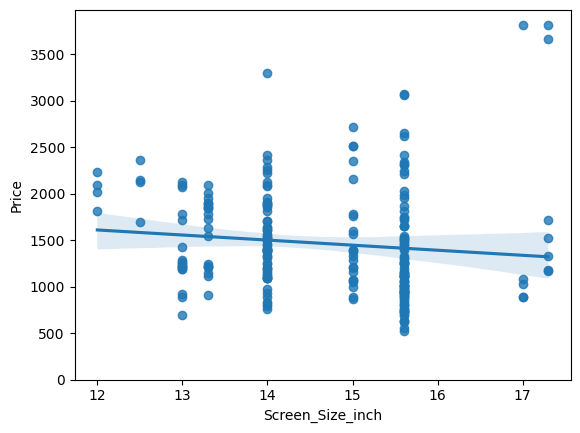

In [10]:
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch', y='Price', data=df)
plt.ylim(0, )

<AxesSubplot:xlabel='Weight_pounds', ylabel='Price'>

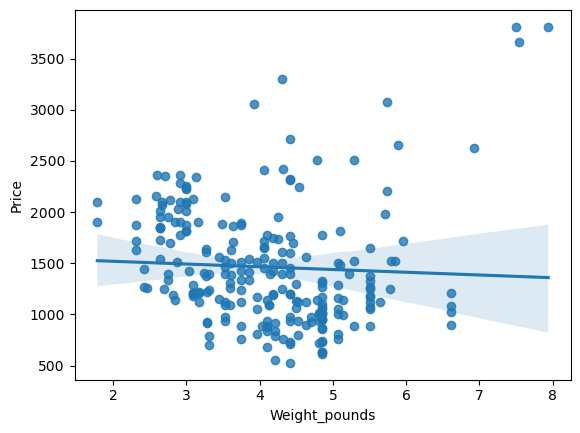

In [11]:
# Weight_pounds plot
sns.regplot(x='Weight_pounds', y='Price', data=df)

In [15]:
# Correlation values of the three attributes with Price
for param in ['Weight_pounds', 'CPU_frequency', 'Screen_Size_inch']:
    print(f"The correlation of {param} and Price is:", df[[param, "Price"]].corr())

The correlation of Weight_pounds and Price is:                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000
The correlation of CPU_frequency and Price is:                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
The correlation of Screen_Size_inch and Price is:                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generating Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<AxesSubplot:xlabel='Category', ylabel='Price'>

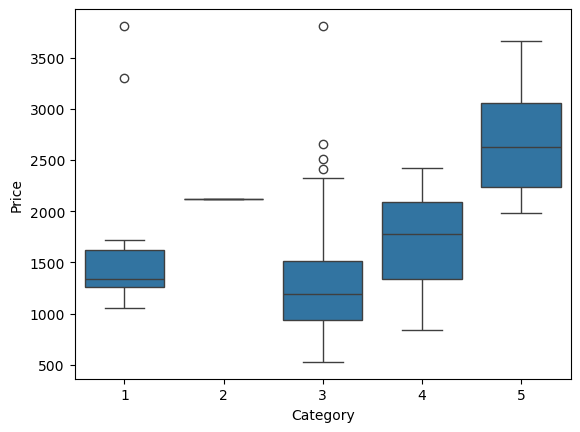

In [17]:
# Category Box plot
sns.boxplot(x=df['Category'], y=df['Price'])

<AxesSubplot:xlabel='GPU', ylabel='Price'>

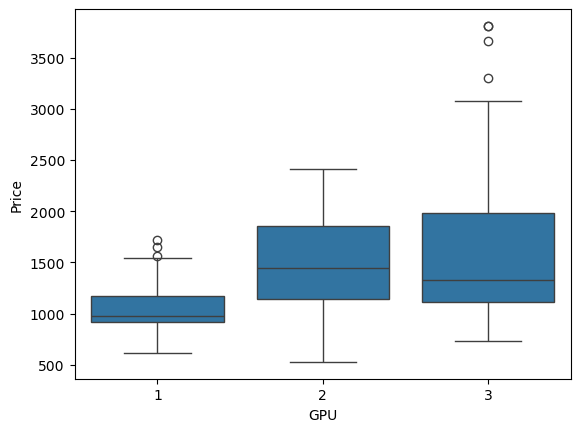

In [18]:
# GPU Box plot
sns.boxplot(x=df['GPU'], y=df['Price'])

<AxesSubplot:xlabel='OS', ylabel='Price'>

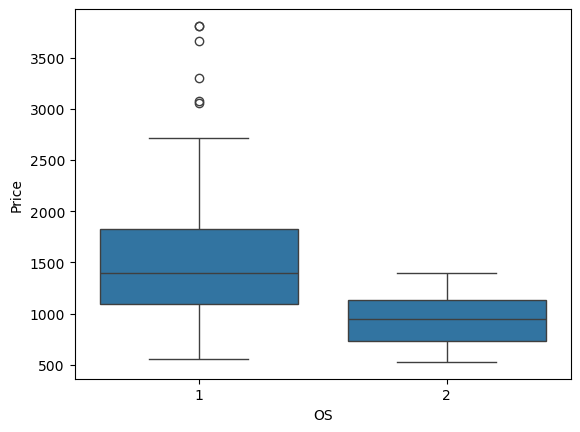

In [19]:
# OS Box plot
sns.boxplot(x=df['OS'], y=df['Price'])


<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

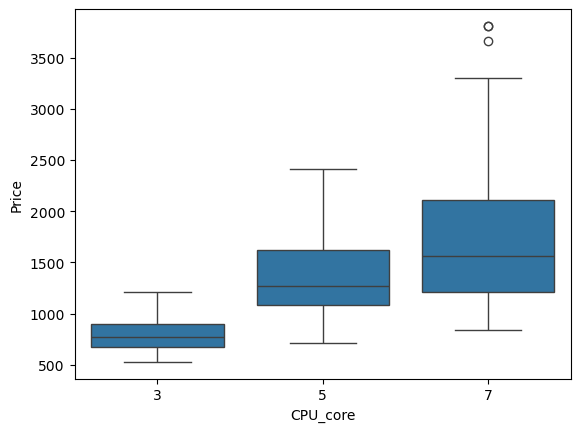

In [20]:
# CPU_core Box plot
sns.boxplot(x=df['CPU_core'], y=df['Price'])

<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

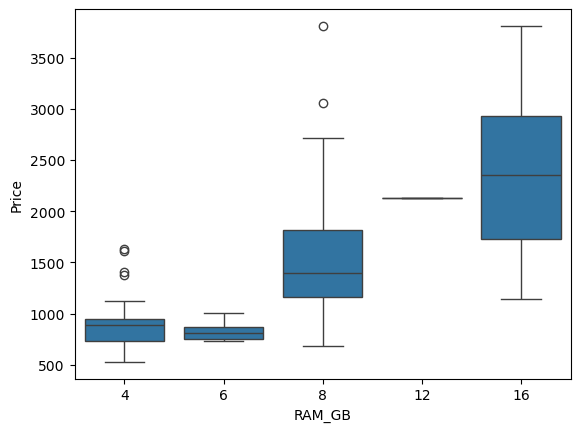

In [21]:
# RAM_GB Box plot
sns.boxplot(x=df['RAM_GB'], y=df['Price'])


<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

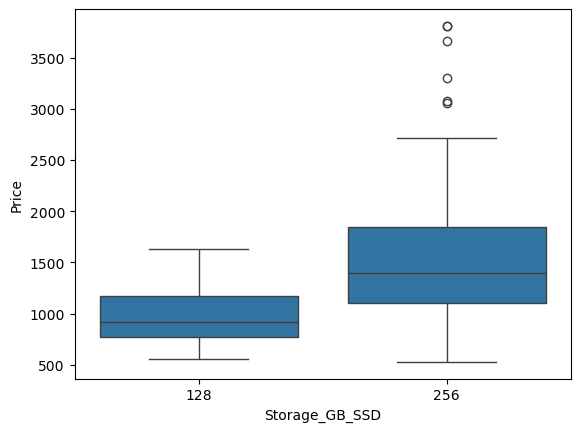

In [22]:
# Storage_GB_SSD Box plot
sns.boxplot(x=df['Storage_GB_SSD'], y=df['Price'])


# Descriptive Statistical Analysis


Generating the statistical description of all the features being used in the data set. Including "object" data types as well.


In [27]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

In [28]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

# GroupBy and Pivot Tables

In [33]:
# Creating the group
dfnew = df[['GPU', 'CPU_core', 'Price']]
dfdf = dfnew.groupby(['GPU', 'CPU_core'], as_index=False).agg({'Price': 'mean'})
dfdf

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [34]:
# Creating the Pivot table
df1 = dfdf.pivot(index='GPU', columns='CPU_core')

In [35]:
df1

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

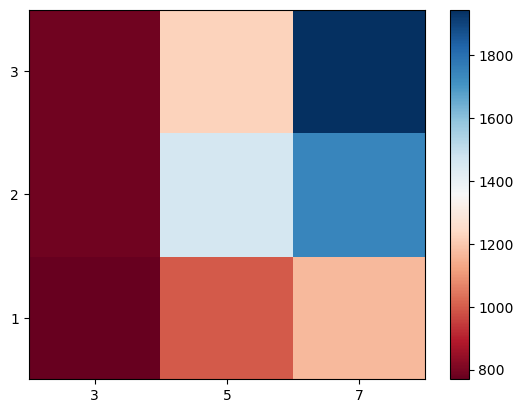

In [38]:
# Creating the Plot
fig, ax = plt.subplots()
im = ax.pcolor(df1, cmap='RdBu')

#label names
row_labels = df1.columns.levels[1]
col_labels = df1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [42]:
df1

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

 Pearson Correlation and p-values

In [46]:
import scipy
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    p_coef, p_value = scipy.stats.pearsonr(df[param], df['Price'])
    print(f"The Pearson Correlation Coefficient between {param} and Price is {p_coef}, and P-value is {p_value}")
    if p_value < 0.05:
        print('This correlation is statistically significant\n')
    else:
        print('This correlation is statistically INsignificant\n')


The Pearson Correlation Coefficient between RAM_GB and Price is 0.5492972971857849, and P-value is 3.6815606288424503e-20
This correlation is statistically significant

The Pearson Correlation Coefficient between CPU_frequency and Price is 0.3666655589258861, and P-value is 5.50246335071342e-09
This correlation is statistically significant

The Pearson Correlation Coefficient between Storage_GB_SSD and Price is 0.24342075521810297, and P-value is 0.00014898923191724168
This correlation is statistically significant

The Pearson Correlation Coefficient between Screen_Size_inch and Price is -0.11064420817118291, and P-value is 0.08853397846830661
This correlation is statistically INsignificant

The Pearson Correlation Coefficient between Weight_pounds and Price is -0.050312258377515455, and P-value is 0.4397693853433894
This correlation is statistically INsignificant

The Pearson Correlation Coefficient between CPU_core and Price is 0.45939777733551174, and P-value is 7.912950127008979e-1

## Author


Abdujabborov Abdurasul